> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#drop unwatned columns and duplicates
df.drop(['id','imdb_id','overview','cast','tagline','keywords','release_date','budget_adj','revenue_adj'], axis=1, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
homepage                0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [7]:
df.head()

,popularity,budget,revenue,original_title,homepage,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2652 entries, 0 to 10819
Data columns (total 12 columns):
popularity              2652 non-null float64
budget                  2652 non-null int64
revenue                 2652 non-null int64
original_title          2652 non-null object
homepage                2652 non-null object
director                2652 non-null object
runtime                 2652 non-null int64
genres                  2652 non-null object
production_companies    2652 non-null object
vote_count              2652 non-null int64
vote_average            2652 non-null float64
release_year            2652 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 269.3+ KB


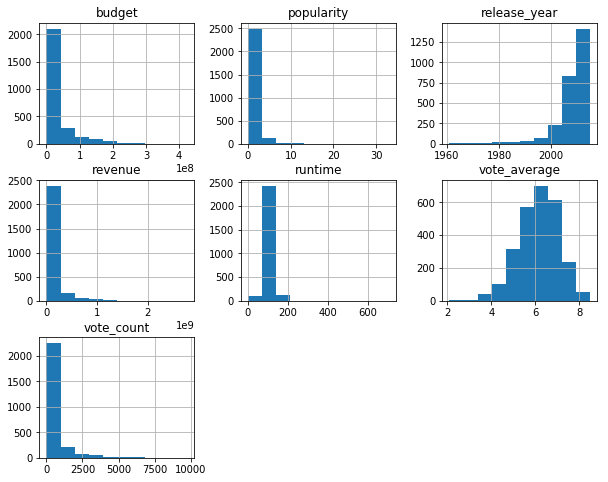

In [9]:
df.hist(figsize=(10,8));

In [11]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2652 entries, 0 to 10819
Data columns (total 12 columns):
popularity              2652 non-null float64
budget                  2652 non-null int64
revenue                 2652 non-null int64
original_title          2652 non-null object
homepage                2652 non-null object
director                2652 non-null object
runtime                 2652 non-null int64
genres                  2652 non-null object
production_companies    2652 non-null object
vote_count              2652 non-null int64
vote_average            2652 non-null float64
release_year            2652 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 269.3+ KB


In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2652 entries, 0 to 10819
Data columns (total 12 columns):
popularity              2652 non-null float64
budget                  2652 non-null int64
revenue                 2652 non-null int64
original_title          2652 non-null object
homepage                2652 non-null object
director                2652 non-null object
runtime                 2652 non-null int64
genres                  2652 non-null object
production_companies    2652 non-null object
vote_count              2652 non-null int64
vote_average            2652 non-null float64
release_year            2652 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 269.3+ KB


In [13]:
df.shape

(2652, 12)


### Data Cleaning (Replace this with more specific notes!)

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['budget'] = df['budget'].astype(int)
df['popularity'] = df['popularity'].astype(float)

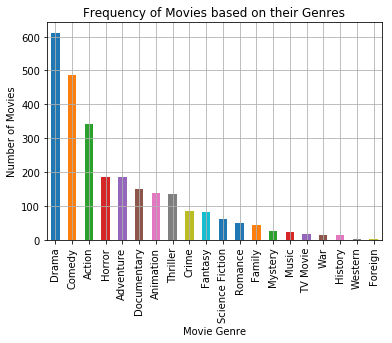

In [41]:
df['genres'] = df['genres'].str.split('|', 1, expand=True)
df.genres.value_counts().plot(kind='bar');
plt.title('Frequency of Movies based on their Genres')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')
plt.grid()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How runtime trending over the time and is that related to revnue trends?)

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#define long runtime movies as l_run in the 3rd quartile

df['l_run'] = df['runtime'] > np.percentile(df['runtime'], 75)

In [17]:
#define revenue as l_rev for long movies

df['l_rev'] = df['revenue'] > np.percentile(df['revenue'], 75)

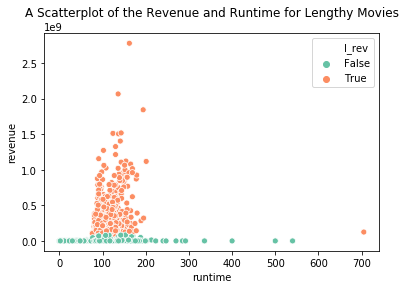

In [88]:
#investigate the revenue of lengthy runtime movies

plot = sns.scatterplot(x="runtime", y="revenue", hue='l_rev', data=df, palette="Set2")
plt.title("A Scatterplot of the Revenue and Runtime for Lengthy Movies", y=1.05);

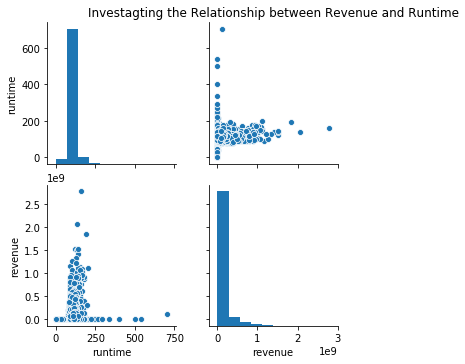

In [77]:
pair_run = sns.pairplot(df, vars=["runtime", "revenue"])
plt.title("Investagting the Relationship between Revenue and Runtime");

### Research Question 2 (How popularity trending over the time and is that related to revnue trends?)

In [20]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#define most popular movies as p in the 3rd quartile

df['p'] = df['popularity'] > np.percentile(df['popularity'], 75)

In [21]:
#define revenue as p_rev for the most popular movies

df['p_rev'] = df['revenue'] > np.percentile(df['revenue'], 75)

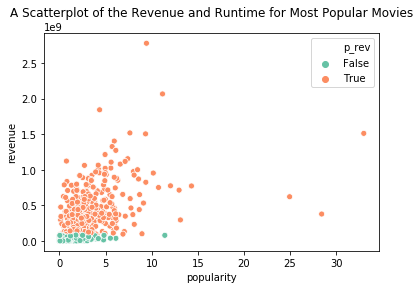

In [86]:
#investigate the revenue of most popular movies

plot = sns.scatterplot(x="popularity", y="revenue", hue='p_rev', data=df, palette="Set2")
plt.title("A Scatterplot of the Revenue and Runtime for Most Popular Movies", y=1.05);

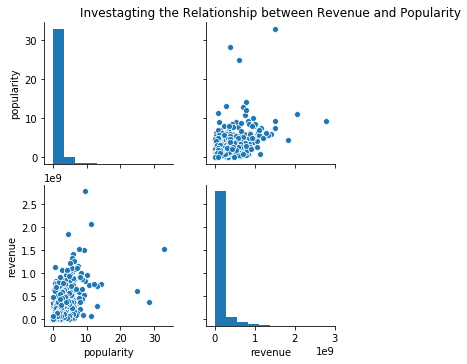

In [78]:
pair_pop = sns.pairplot(df, vars=["popularity", "revenue"])
plt.title("Investagting the Relationship between Revenue and Popularity");

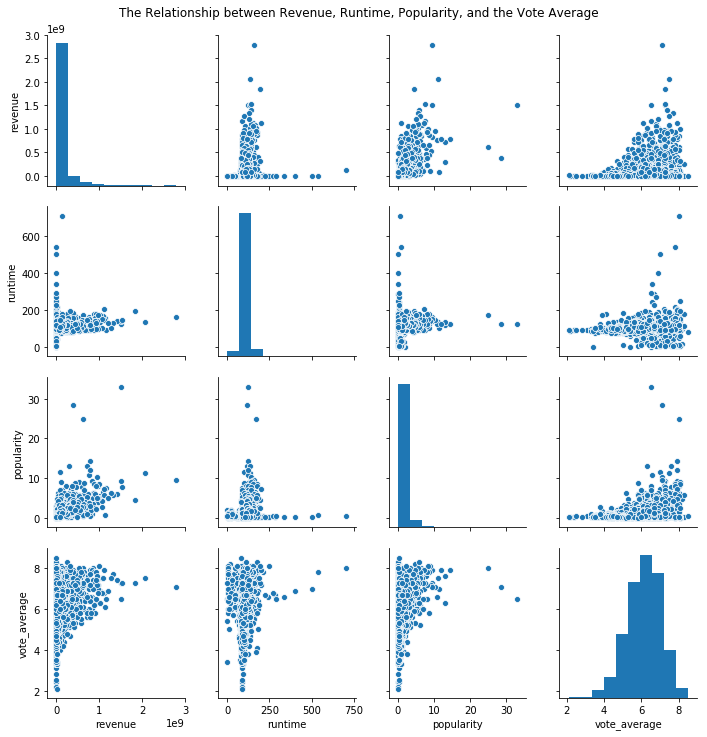

In [79]:
df_pair = df[["revenue", "runtime", "popularity", "vote_average"]]
g = sns.pairplot(df_pair)
g.fig.suptitle("The Relationship between Revenue, Runtime, Popularity, and the Vote Average", y=1.02);

<a id='conclusions'></a>
## Conclusions


### Research Question 1: (How runtime trending over the time and is that related to revnue trends?)
Both the scatter plot the pair plot shown displays that similar runtime movies had different revenue so there is no association between revenue and runtime.

### Research Question 2: (How popularity trending over the time and is that related to revnue trends?)
Both the scatter plot the pair plot shown displays that movies with similar popularity had different
revenue so there is no association between revenue and runtime.

The pair plot for the specified columns (revenue, runtime, popularity, and vote_average) does not clearly show any correlation or assosication in the form of a normal distribtution in all combinations excpet for the revenue and vote average which could lead to relation between the two.

### Limitations:

Although the TMBD Movies dataset is rich with lots of categories and information about the movies, the analysis is still limited as it does not take in cosideration the folliwng:
1. A list of top directors in order to invesitage if there a relation between popularity and revenue for the top directors and the rest of directors.
2. A list of top movie production companies in order to invesitage if they always produce top ratings movies if that generates big revenue when comparing the top movie production companies and the rest of the comapnies.

Dropping missing data cells or null value cells lowered the number of rows significantly, and as a result one of the limitations is the following:
3. Dropping missing or null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed.

### References:

-Udacity lessons, quizzes, and case study

-Google search when debugging some issues